In [0]:
import pandas as pd

df = pd.read_csv('house_data.csv')
dataset = df.values

# df
# dataset.shape, dataset

In [0]:
x = dataset[:, 0:13]
y = dataset[:, 13]

# x.shape, y.shape

In [0]:
from sklearn import preprocessing
import numpy as np

min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)

TransformY = preprocessing.MinMaxScaler()
y_scale = TransformY.fit_transform(y.reshape(y.shape[0],1))

#x_scale, y_scale

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scale, y_scale, test_size=0.2)

#x_train.shape,x_test.shape,x_val.shape

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(10, activation='relu', input_shape=(13,)),
    Dense(1, kernel_initializer='normal')])

In [128]:
from keras import optimizers

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [129]:
trained_model = model.fit(x_train, y_train, batch_size=16, epochs=100, validation_split=0.2) #validation_data=(x_val, y_val))

history = trained_model.history

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 1s 3ms/step - loss: 0.1368 - val_loss: 0.0972
Epoch 2/100
323/323 [==============================] - 0s 221us/step - loss: 0.0842 - val_loss: 0.0696
Epoch 3/100
323/323 [==============================] - 0s 183us/step - loss: 0.0628 - val_loss: 0.0621
Epoch 4/100
323/323 [==============================] - 0s 241us/step - loss: 0.0551 - val_loss: 0.0586
Epoch 5/100
323/323 [==============================] - 0s 185us/step - loss: 0.0508 - val_loss: 0.0542
Epoch 6/100
323/323 [==============================] - 0s 220us/step - loss: 0.0468 - val_loss: 0.0497
Epoch 7/100
323/323 [==============================] - 0s 186us/step - loss: 0.0430 - val_loss: 0.0458
Epoch 8/100
323/323 [==============================] - 0s 201us/step - loss: 0.0394 - val_loss: 0.0422
Epoch 9/100
323/323 [==============================] - 0s 209us/step - loss: 0.0361 - val_loss: 0.0388
Epoch 10/100
323/323 [========

In [0]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=11)
x_train_pca = pca.fit_transform(x_train)
x_test_pca  = pca.transform(x_test)
explained_var = pca.explained_variance_ratio_
np.sum(explained_var[0:11])
pca_out = explained_var[0:11]

In [0]:
from keras.models import Sequential
from keras.layers import Dense

model_pca = Sequential([
    Dense(10, activation='relu', input_shape=(11,)),
    Dense(1, kernel_initializer='normal')])

In [0]:
model_pca.compile(loss='mean_squared_error', optimizer='adam')

In [133]:
trained_model_pca = model_pca.fit(x_train_pca, y_train, batch_size=16, epochs=100, validation_split=0.2)#, validation_data=(x_val, y_val))
history_pca = trained_model_pca.history

Train on 323 samples, validate on 81 samples
Epoch 1/100
323/323 [==============================] - 1s 3ms/step - loss: 0.1957 - val_loss: 0.1730
Epoch 2/100
323/323 [==============================] - 0s 227us/step - loss: 0.1628 - val_loss: 0.1453
Epoch 3/100
323/323 [==============================] - 0s 189us/step - loss: 0.1347 - val_loss: 0.1211
Epoch 4/100
323/323 [==============================] - 0s 189us/step - loss: 0.1098 - val_loss: 0.0990
Epoch 5/100
323/323 [==============================] - 0s 224us/step - loss: 0.0869 - val_loss: 0.0795
Epoch 6/100
323/323 [==============================] - 0s 211us/step - loss: 0.0672 - val_loss: 0.0620
Epoch 7/100
323/323 [==============================] - 0s 198us/step - loss: 0.0516 - val_loss: 0.0486
Epoch 8/100
323/323 [==============================] - 0s 193us/step - loss: 0.0397 - val_loss: 0.0395
Epoch 9/100
323/323 [==============================] - 0s 212us/step - loss: 0.0320 - val_loss: 0.0332
Epoch 10/100
323/323 [========

In [134]:
max_loss = max(history['val_loss'])
min_loss = min(history['val_loss'])

max_loss_pca = max(history_pca['val_loss'])
min_loss_pca = min(history_pca['val_loss'])

print('Max_loss and Min_loss are', max_loss,',', min_loss,'.')
print('Max_loss_pca and Min_loss_pca are', max_loss_pca,',', min_loss_pca,'.')

Max_loss and Min_loss are 0.09721499629732636 , 0.010896338018937968 .
Max_loss_pca and Min_loss_pca are 0.17301385113854467 , 0.00963814733527945 .


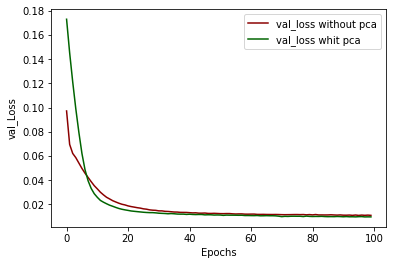

In [135]:
import matplotlib.pyplot as plt

Loss_ = history['val_loss']
Loss_pca = history_pca['val_loss']

plt.xlabel('Epochs')
plt.ylabel('val_Loss')
plt.plot(Loss_, 'darkred')
plt.plot(Loss_pca,'darkgreen')
plt.legend(['val_loss without pca','val_loss with pca'])
plt.show()